## Assignment 1 - ES60011
Name: Bannuru Rohit Kumar Reddy\
Roll No: 21CS30011

## Importing necessary libraries

In [46]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Import the metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import PolynomialFeatures

### Loading the dataset

In [47]:
# Read the dataset 
data = pd.read_csv('data_insurance.csv')

# Exploring the data:

In [48]:
# First let us print the dimensions of the dataset 
print(data.shape)

# Print the head of the dataset to see what kind of data is available
print(data.head())

# Printing the info about the rows and columns of the dataset
print(data.info())

(1338, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


#### Handle Missing Data:
Since there is no missing data, We don't have to deal with it explicitly

In [49]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Frequency distribution of Numerical Columns

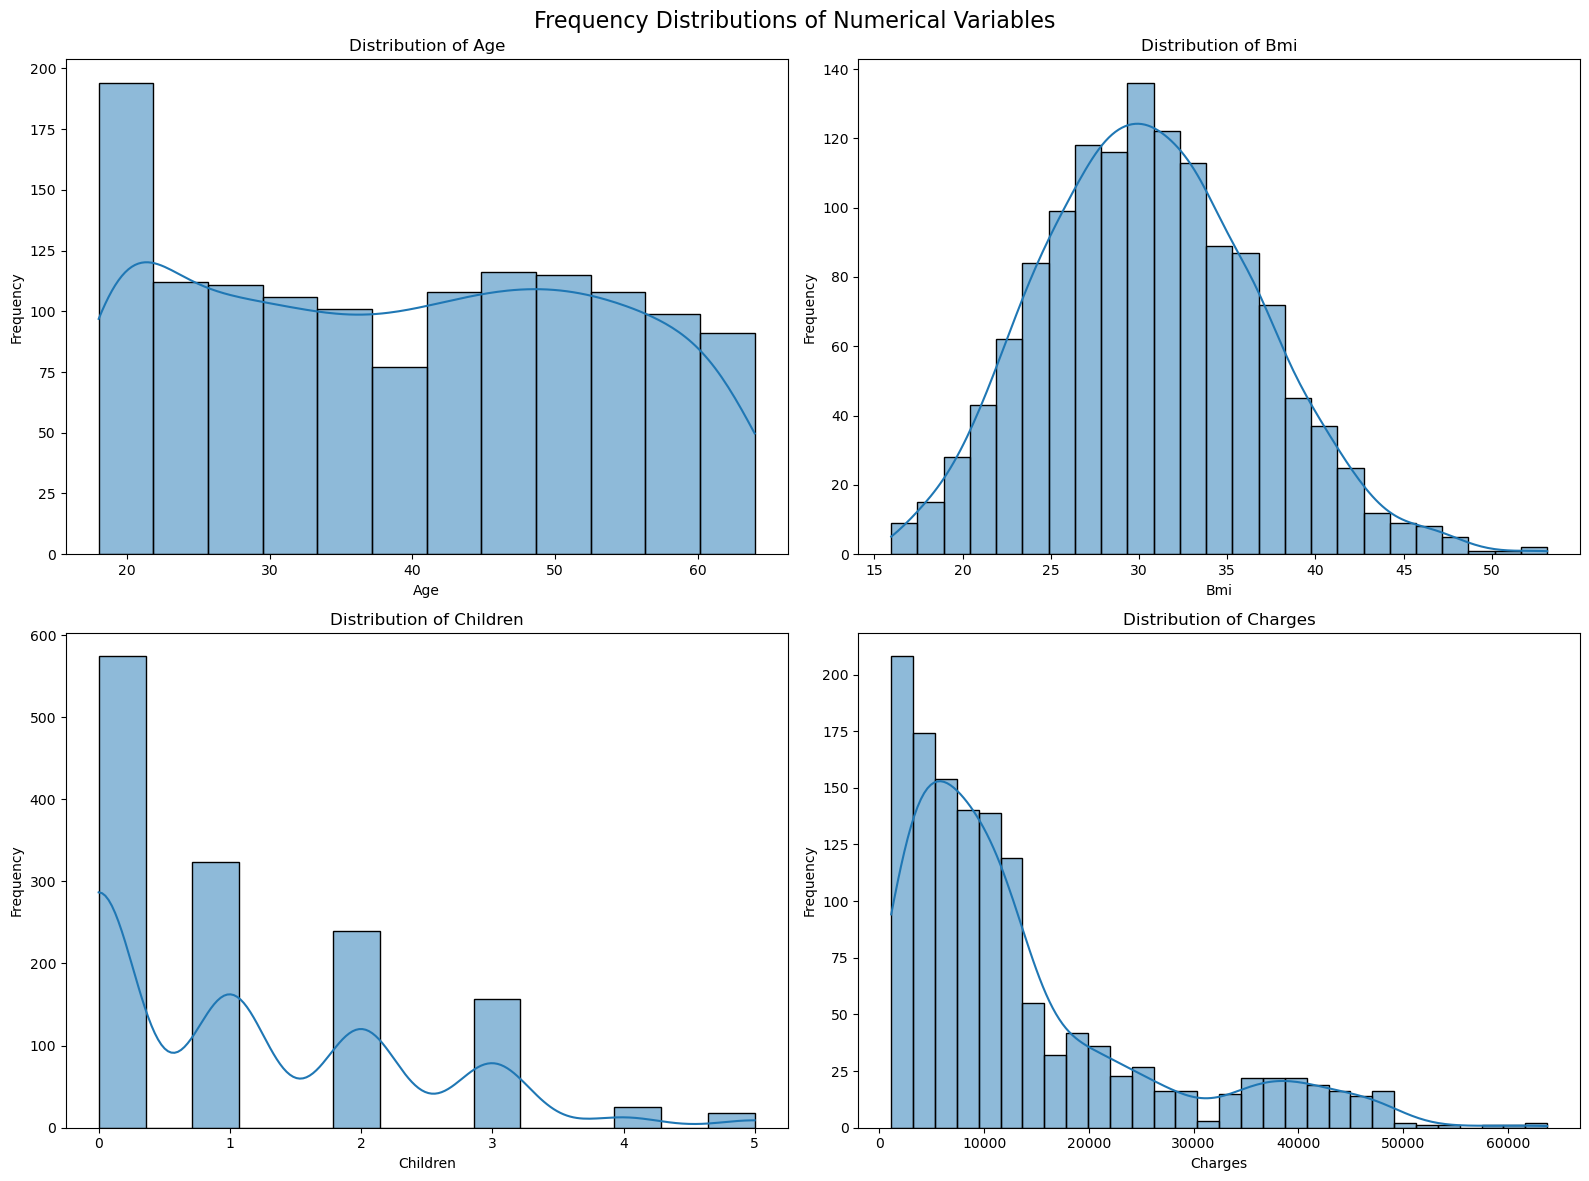


Summary Statistics for Numerical Columns:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [50]:
# List of numerical columns
numerical_columns = ['age', 'bmi', 'children','charges']


# Create subplots for each numerical column
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Frequency Distributions of Numerical Variables', fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histograms and density plots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print summary statistics for the numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(data[numerical_columns].describe())

#### Analysis of Categorical features

In [51]:
# Looking at the number of categories in sex, smoker and region columns
print("Distinct categories in 'sex':")
print(data['sex'].unique())
print("\nCount of each category in 'sex':")
print(data['sex'].value_counts())

# Now the same for 'smoker' column
print("\nDistinct categories in 'smoker':")
print(data['smoker'].unique())
print("\nCount of each category in 'smoker':")
print(data['smoker'].value_counts())

# Now the same for 'region' column
print("\nDistinct categories in 'region':")
print(data['region'].unique())
print("\nCount of each category in 'region':")
print(data['region'].value_counts())

Distinct categories in 'sex':
['female' 'male']

Count of each category in 'sex':
male      676
female    662
Name: sex, dtype: int64

Distinct categories in 'smoker':
['yes' 'no']

Count of each category in 'smoker':
no     1064
yes     274
Name: smoker, dtype: int64

Distinct categories in 'region':
['southwest' 'southeast' 'northwest' 'northeast']

Count of each category in 'region':
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [52]:
# Converting the categorical columns to numerical columns
# Represent male by 1 and female by 0 in sex column
data['sex'] = data['sex'].map({'male':1, 'female':0})

# Represent smoker by 1 and non-smoker by 0 in smoker column
data['smoker'] = data['smoker'].map({'yes':1, 'no':0})

# To convert the region column, we will use one-hot encoding
df = pd.get_dummies(data, columns=['region'])
print(df.head())   

   age  sex     bmi  children  smoker      charges  region_northeast  \
0   19    0  27.900         0       1  16884.92400                 0   
1   18    1  33.770         1       0   1725.55230                 0   
2   28    1  33.000         3       0   4449.46200                 0   
3   33    1  22.705         0       0  21984.47061                 0   
4   32    1  28.880         0       0   3866.85520                 0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
2                 0                 1                 0  
3                 1                 0                 0  
4                 1                 0                 0  


### Correlation between Input features and Target Feature


Correlation of each feature with 'charges':
charges             1.000000
smoker              0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex                 0.057292
region_northeast    0.006349
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64


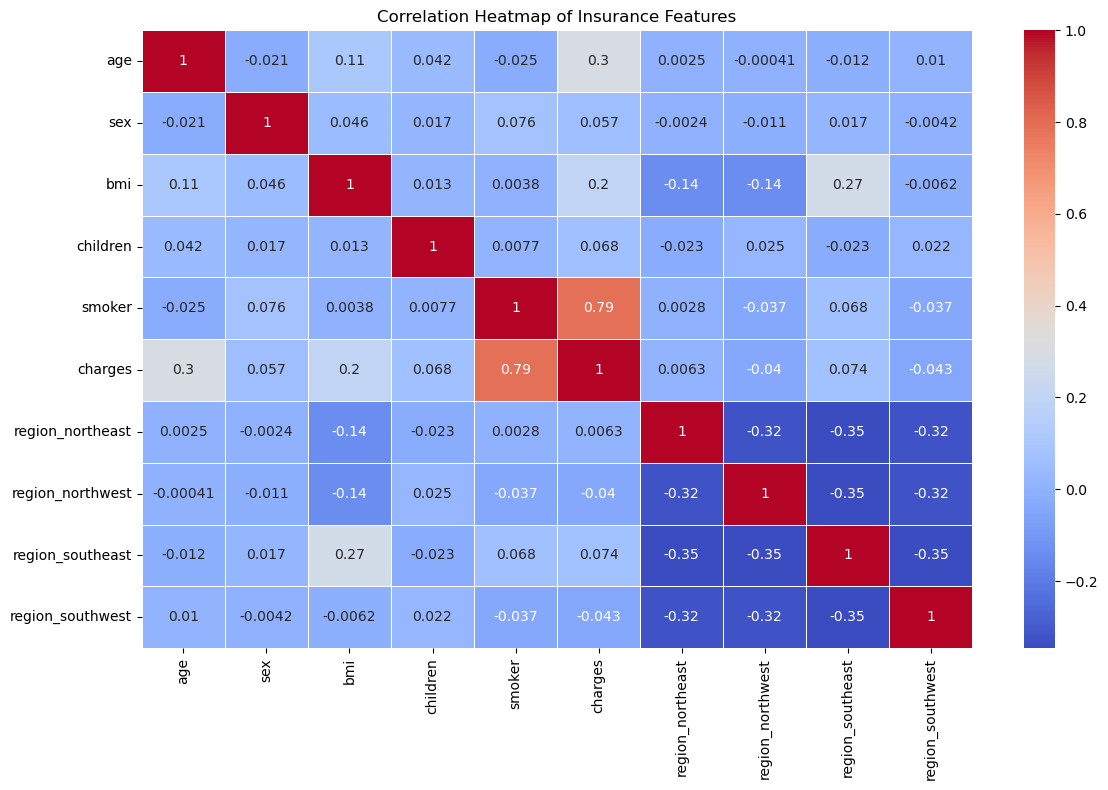

In [53]:
# Calculate correlation with 'charges'
correlation_with_charges = df.corr()['charges'].sort_values(ascending=False)

print("\nCorrelation of each feature with 'charges':")
print(correlation_with_charges)

# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Insurance Features')
plt.tight_layout()
plt.show()

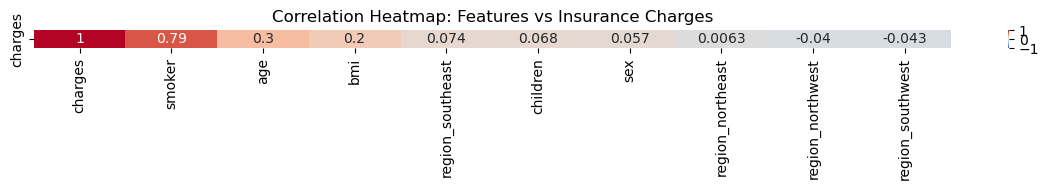

In [54]:
# Create a heatmap focusing only on 'charges' correlations
plt.figure(figsize=(12, 2))
sns.heatmap(df.corr()[['charges']].sort_values(by='charges', ascending=False).T, 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap: Features vs Insurance Charges')
plt.tight_layout()
plt.show()

## Train the linear regressoin model

In [55]:
# Now let us split the dataset into input features and output varaible
X = df.drop('charges', axis=1)
y = df['charges']

## Splitting the dataset 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create an instance of the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

### Make Predicton

In [56]:
# Use the model on the training and testing data
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)


# Calculate the metrics
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

# Print the training and testing metrics
print("Training MSE: {:.4f}".format(train_mse))
print("Testing MSE: {:.4f}".format(test_mse))

print("\nTraining R^2: {:.4f}".format(train_r2))
print("Testing R^2: {:.4f}".format(test_r2))

Training MSE: 36787756.3705
Testing MSE: 35479352.8073

Training R^2: 0.7478
Testing R^2: 0.7623


In [57]:
# Define the Ridge and Lasso models
ridge_model = Ridge()
lasso_model = Lasso()

# Define the parameter grid for alpha (regularization strength)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Perform Grid Search with Lasso
lasso_grid = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

# Get the best estimator
best_lasso = lasso_grid.best_estimator_

# Predict and evaluate Lasso model
lasso_train_preds = best_lasso.predict(X_train)
lasso_test_preds = best_lasso.predict(X_test)

lasso_train_mse = mean_squared_error(y_train, lasso_train_preds)
lasso_test_mse = mean_squared_error(y_test, lasso_test_preds)

lasso_train_r2 = r2_score(y_train, lasso_train_preds)
lasso_test_r2 = r2_score(y_test, lasso_test_preds)

print("\nLasso Regression:")
print("Best Alpha:", lasso_grid.best_params_['alpha'])
print("Training MSE: {:.4f}".format(lasso_train_mse))
print("Testing MSE: {:.4f}".format(lasso_test_mse))
print("Training R^2: {:.4f}".format(lasso_train_r2))
print("Testing R^2: {:.4f}".format(lasso_test_r2))



Lasso Regression:
Best Alpha: 0.1
Training MSE: 36787756.6681
Testing MSE: 35479484.6304
Training R^2: 0.7478
Testing R^2: 0.7623


c:\Users\USER\anaconda3\envs\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.061e+09, tolerance: 1.253e+07
  model = cd_fast.enet_coordinate_descent(


## Model Refinement
#### Using interaction terms

In [58]:
# Add interaction terms to the dataset
df['age_bmi'] = df['age'] * df['bmi']

# Split the dataset into input features and output variable
X_interact = df.drop('charges', axis=1)
y_interact = df['charges']

# Split the dataset into training and testing sets
X_train_interact, X_test_interact, y_train_interact, y_test_interact = train_test_split(X_interact, y_interact, test_size=0.2, random_state=1)

# Create an instance of the model
model_interact = LinearRegression()

# Fit the model on the training data
model_interact.fit(X_train_interact, y_train_interact)

# Use the model on the training and testing data
train_preds_interact = model_interact.predict(X_train_interact)
test_preds_interact = model_interact.predict(X_test_interact)

# Calculate the metrics
train_mse_interact = mean_squared_error(y_train_interact, train_preds_interact)
test_mse_interact = mean_squared_error(y_test_interact, test_preds_interact)

train_r2_interact = r2_score(y_train_interact, train_preds_interact)
test_r2_interact = r2_score(y_test_interact, test_preds_interact)

# Print the training and testing metrics
print("\nTraining MSE (Interaction Model): {:.4f}".format(train_mse_interact))
print("Testing MSE (Interaction Model): {:.4f}".format(test_mse_interact))

print("\nTraining R^2 (Interaction Model): {:.4f}".format(train_r2_interact))
print("Testing R^2 (Interaction Model): {:.4f}".format(test_r2_interact))


Training MSE (Interaction Model): 23835059.5169
Testing MSE (Interaction Model): 21344095.9090

Training R^2 (Interaction Model): 0.8366
Testing R^2 (Interaction Model): 0.8570


#### Adding polynoinmal features

In [59]:
# Adding polynomial features to the dataset between age and bmi

# Create polynomial features (e.g., degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['age', 'bmi']])

# Add the polynomial features to the dataset

# Convert the array back to a DataFrame and add it to the original DataFrame
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['age', 'bmi']))
df = pd.concat([df, poly_features_df], axis=1)

# Remove one instance of 'age' and 'bmi' columns
df.drop(columns=['age', 'bmi'], inplace=True)

# Train a model with polynomial features
X_poly = df.drop('charges', axis=1)
y_poly = df['charges']

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=1)

model_poly = LinearRegression()

model_poly.fit(X_train_poly, y_train_poly)

train_preds_poly = model_poly.predict(X_train_poly)
test_preds_poly = model_poly.predict(X_test_poly)

train_mse_poly = mean_squared_error(y_train_poly, train_preds_poly)
test_mse_poly = mean_squared_error(y_test_poly, test_preds_poly)

train_r2_poly = r2_score(y_train_poly, train_preds_poly)
test_r2_poly = r2_score(y_test_poly, test_preds_poly)

print("\nTraining MSE (Polynomial Model): {:.4f}".format(train_mse_poly))
print("Testing MSE (Polynomial Model): {:.4f}".format(test_mse_poly))

print("\nTraining R^2 (Polynomial Model): {:.4f}".format(train_r2_poly))
print("Testing R^2 (Polynomial Model): {:.4f}".format(test_r2_poly))


Training MSE (Polynomial Model): 23436183.0624
Testing MSE (Polynomial Model): 20977320.2207

Training R^2 (Polynomial Model): 0.8393
Testing R^2 (Polynomial Model): 0.8595


## Analyze Model Coefficients:

In [60]:
# Analyzing the coefficients of the polynomial model
coefficients = model_poly.coef_

# Pair the feature names with the coefficients
feature_names = X_poly.columns
coefficients_named = list(zip(feature_names, coefficients))

# Sort the coefficients from the model
coefficients_named = sorted(coefficients_named, key=lambda x: x[1], reverse=True)

# Print the coefficients
print("\nPolynomial Model Coefficients:")
for feature, coef in coefficients_named:
    print(f"{feature}: {coef:.2f}")


Polynomial Model Coefficients:
bmi_smoker: 1448.64
region_northeast: 704.07
children: 573.80
region_northwest: 175.54
age^2: 2.55
age bmi: 2.12
bmi^2: -1.28
age_smoker: -20.41
region_southeast: -428.97
region_southwest: -450.64
sex: -672.51
smoker: -19752.11
